In [1]:
# import data manipulation and visualisation libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# import nltk libraries for text mining
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
#read the dictionary that contain keywords of body parts
dic = open("body parts name.txt","r")
body_dict = dic.read()

In [3]:
# import cleaned and labelled Osha accident cases dataset
df_osha = pd.read_csv('osha_fatal_clean_cause_labelled.csv')

In [4]:
# drop the unused columns
df_osha = df_osha.drop(["Unnamed: 0"], axis = 1)

In [5]:
# inspect the dataset
df_osha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6568 entries, 0 to 6567
Data columns (total 6 columns):
incident_ID                    6568 non-null int64
title                          6568 non-null object
description                    6568 non-null object
cause                          6568 non-null object
title_description              6568 non-null object
title_description_processed    6568 non-null object
dtypes: int64(1), object(5)
memory usage: 308.0+ KB


In [6]:
# Combine the string in "title" and "description" adn stored in a new column
df_osha['title_description'] = df_osha['title'] + " " + df_osha['description']

In [7]:
# define a function for text mining with the following steps:
# 1. remove the non English words
# 2. tokenize the string for each row
# 3. remove punctiation
# 4. convert each of the token to lower case
# 5. remove stopwords
# 6. lemmatize each of the token
# 7. join the tokens back into string

mystopwords = stopwords.words("English")
wnlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    tokens_nop = [word for word in tokens if word not in string.punctuation]
    tokens_lower = [ word.lower() for word in tokens_nop ]
    tokens_nostop = [word for word in tokens_lower if word not in mystopwords]
    tokens_lemma = [wnlemma.lemmatize(word) for word in tokens_nostop]
    text_after_process = " ".join(tokens_lemma)
    return(text_after_process)

In [8]:
# apply the "pre_process" function on each row of "title" column of labelled Osha accident cases dataset
df_osha['title_description_process'] = df_osha['title_description'].apply(pre_process)

In [9]:
# define a function for occupations word extraction with the following steps:
# 1. remove the non English words
# 2. tokenize the string for each row
# 3. extract the unique body parts keyword
# 4. join the tokens back into string

body_dict_token = nltk.word_tokenize(body_dict)

def extraction(text):
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    tokens_body = [word for word in tokens if word in body_dict_token]
    text_after_process = " ".join(set(tokens_body))
    return(text_after_process)

In [10]:
# apply the "extraction" function on each row of "title_description_processed" column of labelled Osha accident cases dataset
df_osha['body_parts'] = df_osha['title_description_process'].apply(extraction)

In [11]:
# Concatenate all the body parts keyword into one huge text file
body_part_string = ""
for word in df_osha['body_parts']:
    body_part_string += " " + word

In [12]:
# tokenize the string with all body parts
body_part_token = nltk.word_tokenize(body_part_string)

In [13]:
# store the body parts extracted in a dataframe
df_body_parts = pd.DataFrame(data=body_part_token)
df_body_parts = df_body_parts.rename(columns={0: "body_parts"})

In [14]:
# calculate the top 20 number of body parts that cause accidents
df_body_parts['body_parts'].value_counts().head(20)

head        1129
foot         973
back         831
hand         503
body         481
chest        294
arm          286
leg          268
face         261
finger       203
neck         192
heart        177
shoulder     140
blood         90
button        78
knee          68
torso         64
eye           63
brain         60
skull         56
Name: body_parts, dtype: int64

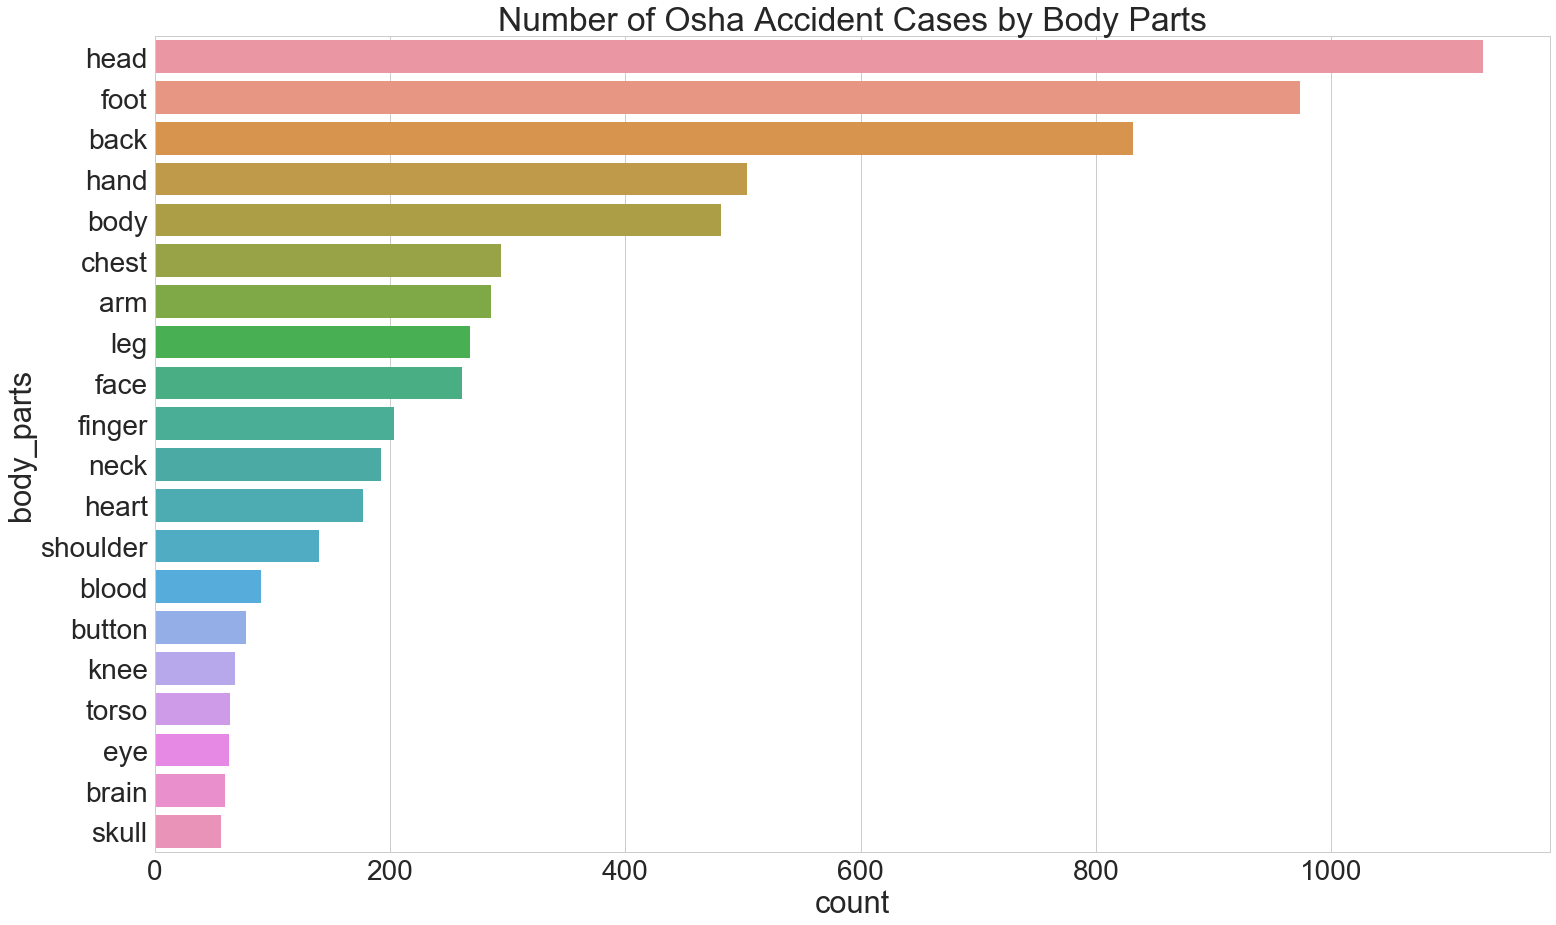

In [15]:
# plot the barchart of the top 20 number of body parts that cause accidents
plt.figure(figsize=(25,15))
sns.set(style="whitegrid", font_scale=2.8)
ax = sns.countplot(y="body_parts", data=df_body_parts, order=df_body_parts['body_parts'].value_counts().head(20).index)
ax.set_title('Number of Osha Accident Cases by Body Parts')
plt.show()

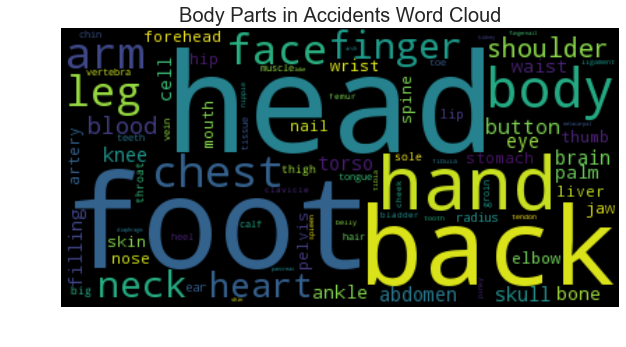

In [16]:
# Generate a body parts word cloud image
wordcloud = WordCloud(collocations=False).generate(body_part_string)
plt.figure(figsize=(10, 8))
plt.title('Body Parts in Accidents Word Cloud', fontsize = 20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()